In [1]:
# Import Libraries
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Define a function to fetch data from Yahoo Finance
def fetch_stock_data(ticker_symbol, start_date, end_date):
    try: 
        # Download ticket symbol data based on date range and store in data frame
        stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"Error fetching data for ticket {ticker_symbol}: {e}")
        return None

# Define a function to assist with making the decision to buy, sell or hold  
def decision_support(predicted_return):
    if predicted_return > 0:
        return "Buy"
    elif predicted_return < 0:
        return "Sell"
    else:
        return "Hold"

Step 1: Data Collection. 

Use historical stock price data from Yahoo Finance. We'll use Python with the yfinance library to fetch the data. 

In [3]:
# Create ticke symbol variable
ticker_symbol = "AAPL"

# Create start and end date variable
start_date = "2024-01-01"
end_date = "2024-03-21"

# Call the function to download the data from Yahoo Finance and store in data frame
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Display the first 5 rows of the downloaded data
print(stock_data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.403412   
2024-01-03  184.220001  185.880005  183.429993  184.250000  184.015198   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.678177   
2024-01-05  181.990005  182.759995  180.169998  181.179993  180.949097   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.323517   

              Volume  
Date                  
2024-01-02  82488700  
2024-01-03  58414500  
2024-01-04  71983600  
2024-01-05  62303300  
2024-01-08  59144500  


Step 2: Data Preprocessing

Preprocess the fetched data to ensure it's clean and ready for analysis. 

- Handle missing values (if any).
- Convert the data into a format suitable for analysis.
- Ensure that the dataset includes at least the date and closing price columns.

In [5]:
if stock_data is not None:
    # Drop rows with missing Values
    stock_data.dropna(inplace=True)

    # Keep only the "Date" and "Close" column
    stock_data = stock_data[["Close"]]

    # Reset the index to make "Date" a column
    stock_data.reset_index(inplace=True)

    print("Preprocessed Stock Data:")
    print(stock_data.head())
else:
    print("Failed to fetch stock data, Please check the ticker symbol and try again.")

Preprocessed Stock Data:
        Date       Close
0 2024-01-02  185.639999
1 2024-01-03  184.250000
2 2024-01-04  181.910004
3 2024-01-05  181.179993
4 2024-01-08  185.559998


Step 3: Feature Engineering

Create a new column for daily percentage returns. This column will represent the daily percentage change in the stock's closing price.

In [6]:
# Create a new column for daily percentage returns
stock_data["Daily_Return"] = stock_data["Close"].pct_change() * 100

# Remove rows with missing values
stock_data = stock_data.dropna()

print("Preprocessed Stock Data with Daily Percentage Returns:")
print(stock_data.head())

Preprocessed Stock Data with Daily Percentage Returns:
        Date       Close  Daily_Return
1 2024-01-03  184.250000     -0.748761
2 2024-01-04  181.910004     -1.270012
3 2024-01-05  181.179993     -0.401303
4 2024-01-08  185.559998      2.417488
5 2024-01-09  185.139999     -0.226341


C:\Users\abmsajt\AppData\Local\Temp\ipykernel_22832\1642227881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Daily_Return"] = stock_data["Close"].pct_change() * 100


Step 4: Exploratory Data Analysis (EDA)

Explore the preprocessed stock data to gain insights into the stock's historical performance. We'll visualize the trends, identify periods of volatility, and understand the behavior of the stock over time.

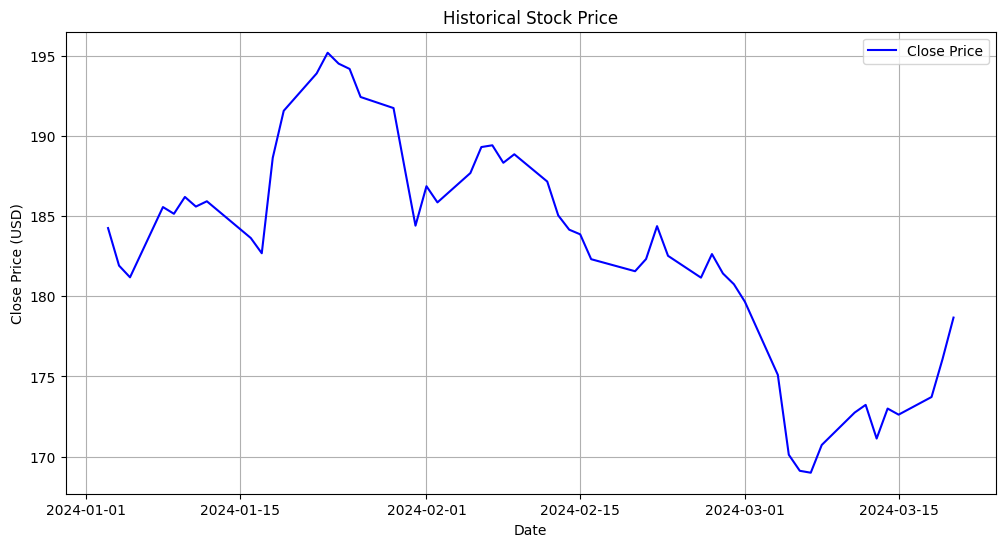

In [7]:
# Visualize the stock's historical performance
plt.figure(figsize=(12, 6))
plt.plot(stock_data["Date"], stock_data["Close"], label="Close Price", color="blue")
plt.title("Historical Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

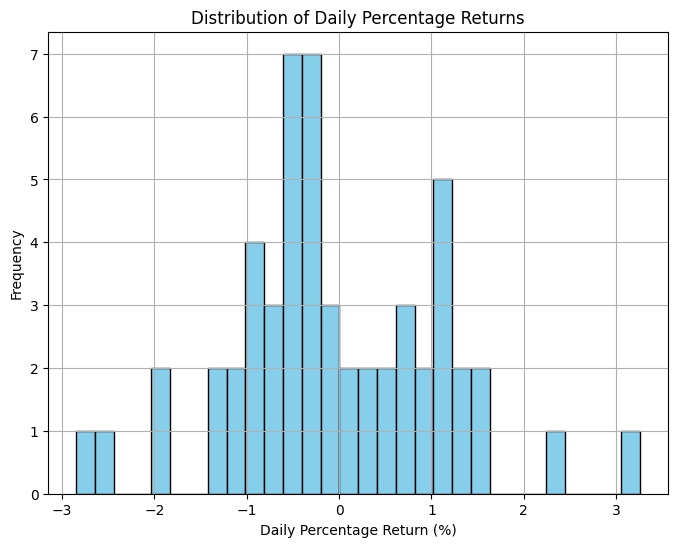

In [8]:
# Visualize the distribution of daily percentage returns
plt.figure(figsize=(8, 6))
plt.hist(stock_data["Daily_Return"].dropna(), bins=30, edgecolor="black", color="skyblue")
plt.title("Distribution of Daily Percentage Returns")
plt.xlabel("Daily Percentage Return (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Step 5: Train-Test Split

Split the preprocessed data into training and testing sets. We'll use the training set to train our predictive model and the testing set to evaluate its performance.

In [9]:
# Create the Target and feature variable
X = stock_data[["Close"]]
y = stock_data["Daily_Return"]

# Split the data into Train and Test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split:")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Train-Test Split:
Training set size: 43
Test set size: 11


Step 6: Model Selection

Choose a simple predictive model for stock price prediction. Since we are predicting the daily percentage returns based on historical closing prices, we'll start with a Linear Regression model.

In [10]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Step 7: Prediction

Use the trained Linear Regression model to make predictions on the testing set. We'll then evaluate the model's performance by comparing the predicted values with the actual values.

In [11]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) as a metric
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1.6013931666675199


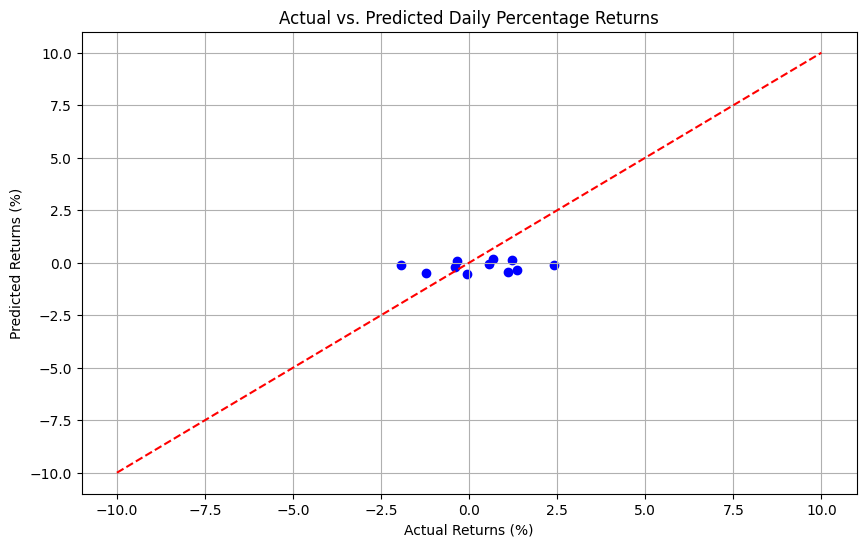

In [12]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([-10, 10], [-10, 10], linestyle="--", color="red") # Plot diagonal line
plt.title("Actual vs. Predicted Daily Percentage Returns")
plt.xlabel("Actual Returns (%)")
plt.ylabel("Predicted Returns (%)")
plt.grid(True)
plt.show()

Step 8: Visualization

Visualize the model's predictions against the actual stock prices to assess its performance. We'll plot time series charts to compare the predicted and actual returns over time.

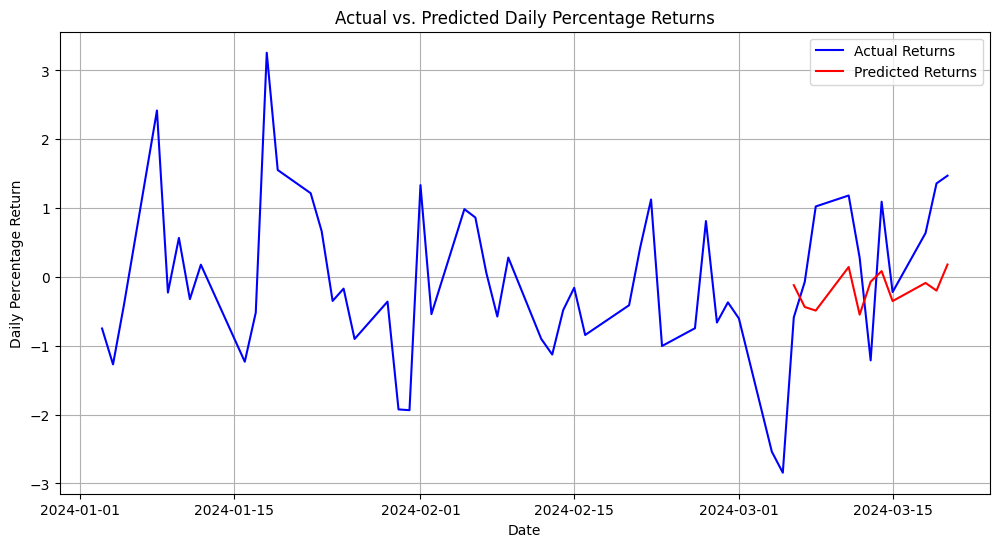

In [13]:
# Visualize the model's predicated vs. actual returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data["Date"], stock_data["Daily_Return"], label="Actual Returns", color="blue")
plt.plot(stock_data["Date"].iloc[len(stock_data) - len(y_pred):], y_pred, label="Predicted Returns", color="red")
plt.title("Actual vs. Predicted Daily Percentage Returns")
plt.xlabel("Date")
plt.ylabel("Daily Percentage Return")
plt.legend()
plt.grid(True)
plt.show()

Step 9: Decision Support System

Create a simple decision support system that provides recommendations to users based on the model's predictions. We'll define some basic rules to suggest whether to "Buy," "Sell," or "Hold" the stock based on the predicted daily percentage returns.

In [14]:
# Get the most recent closing price for prediction
recent_price = stock_data["Close"].iloc[-1]

# Predict the next day's percentage return
next_day_return = model.predict([[recent_price]])[0]

# Use the decision support tool to provide the recommendation.
recommendation = decision_support(next_day_return)

print(f"Recommendation for teh nex trading day: {recommendation}")

Recommendation for teh nex trading day: Sell


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
